In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
df =  pd.read_csv('bottle.csv')
df_binary = df[['Salnty', 'T_degC', 'Depthm']]  # Select three features
df_binary.columns = ['Sal', 'Temp', 'Depth']  # Rename columns
df_binary.dropna(inplace=True)

<ipython-input-28-80bc424b193f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_binary.dropna(inplace=True)


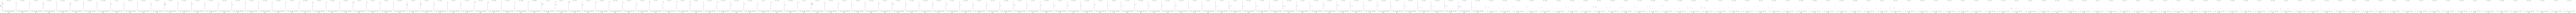

In [ ]:
#sns.lmplot(x =['Sal','Depth'], y ="Temp", data = df_binary, order = 2, ci = None)
g = sns.FacetGrid(df_binary, col='Sal')  # Split by column 'Sal'
g.map(sns.scatterplot,'Sal','Temp')  # Scatterplot of Temp vs Sal on each facet
g.map(sns.scatterplot,'Depth','Temp')  # Scatterplot of Temp vs Depth on each facet

plt.show()

In [ ]:
df_binary.fillna(method ='ffill', inplace = True)
df_binary.dropna(inplace = True)
selected_features = ['Sal','Depth']
X = df_binary[selected_features].to_numpy().reshape(-1, len(selected_features))
y = np.array(df_binary['Temp']).reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)
regr = LinearRegression()
regr.fit(X_train, y_train)
print("Score:",regr.score(X_test, y_test))

y_pred = regr.predict(X_test)
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) #default=True
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

Score: 0.8880739384889003
MAE: 0.7616603146645522
MSE: 0.9051462254076281
RMSE: 0.9513917307858147


<ipython-input-34-6e7c049d5ed7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_binary.fillna(method ='ffill', inplace = True)
<ipython-input-34-6e7c049d5ed7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_binary.dropna(inplace = True)


In [ ]:
df_binary500 = df_binary[:][:500]
df_binary500.fillna(method ='ffill', inplace = True)
df_binary500.dropna(inplace = True)
X = df_binary500[selected_features].to_numpy().reshape(-1, len(selected_features))
y = np.array(df_binary500['Temp']).reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,random_state=45)
regr = LinearRegression()
regr.fit(X_train, y_train)
print("the score is :", regr.score(X_test, y_test))
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) #default=True
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

the score is : 0.8456437578472142
MAE: 3.242945834916241
MSE: 17.416017470414424
RMSE: 4.173250228588555
